In [1]:
# K-means

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data

In [3]:
import time
from sklearn import cluster

start = time.perf_counter()

kmeans_fit = cluster.KMeans(n_clusters = 3).fit(x)

end = time.perf_counter()

In [4]:
exetime = end - start
print("執行時間:", round(exetime,5))

執行時間: 0.051


In [5]:
y_pred = kmeans_fit.labels_
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [6]:
y_true = iris.target
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity = round(purity_score(y_true,y_pred),5)
print("純度為",purity)

純度為 0.89333


In [8]:
# -----------------------------------------------
# 階層式分群

In [9]:
from sklearn import datasets
import pandas as pd 
iris = datasets.load_iris()
x = iris.data
y_true = iris.target

In [10]:
import time
from sklearn.cluster import AgglomerativeClustering

start = time.perf_counter()

hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc.fit_predict(x)

end = time.perf_counter()

In [11]:
exetime = end - start
print("執行時間:", round(exetime,5))

執行時間: 0.01049


In [12]:
y_pred = hc.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [13]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity = round(purity_score(y_true,y_pred),5)
print("純度為",purity)

純度為 0.89333


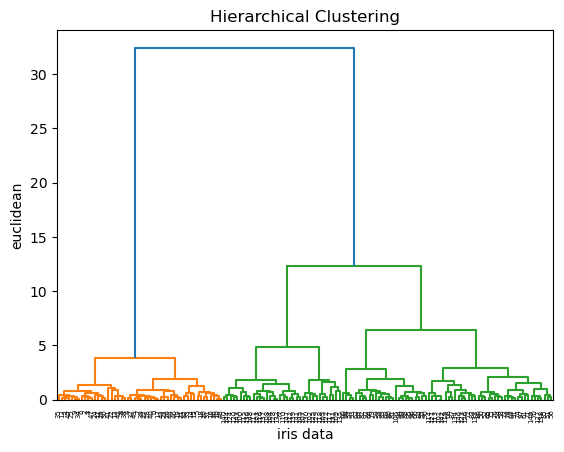

In [21]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dis=sch.linkage(x,metric='euclidean',method='ward')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.xlabel('iris data')
plt.ylabel('euclidean')
plt.show()

In [15]:
# -----------------------------------------------
# DBSCAN

In [16]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y_true = iris.target

In [17]:
import time
from sklearn.cluster import DBSCAN

start = time.perf_counter()

y_pred=DBSCAN(eps=0.3,min_samples=10).fit(x)

end = time.perf_counter()

In [18]:
exetime = end - start
print("執行時間:", round(exetime,5))

執行時間: 0.00212


In [19]:
y_pred =y_pred.labels_
y_pred

array([ 0,  1,  1,  1,  0, -1, -1,  0,  1,  0, -1,  0,  1, -1, -1, -1, -1,
        0, -1,  0, -1,  0, -1, -1, -1,  1,  0,  0,  0,  1,  1, -1, -1, -1,
        0,  0, -1,  0,  1,  0,  0, -1,  1, -1, -1,  1,  0,  1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [20]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity = round(purity_score(y_true,y_pred),5)
print("純度為",purity)

純度為 0.53333
